# Water-Well-Classification-PT2

## Part 2: Exploring a Few Different Approaches

#### Loading libraries and data

In [1]:
# Import the relevant libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# Increase column width to display df
pd.set_option('display.max_columns', None)

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [10]:
# Load the data
raw_df1 = pd.read_csv('dfA.csv')

# print the shape
print("Raw_df1:", raw_df1.shape)

Raw_df1: (35303, 18)


In [11]:
raw_df1.head()

,Unnamed: 0,amount_tsh,gps_height,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,1,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,280,1.0,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
1,2,25.0,686,37.460664,-3.821329,Pangani,Manyara,250,1.0,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,0
2,3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1.0,1986,submersible,vwc,never pay,good,dry,borehole,communal standpipe,1
3,5,20.0,0,39.172796,-4.765587,Pangani,Tanga,1,1.0,2009,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe,0
4,10,0.0,62,39.209518,-7.034139,Wami / Ruvu,Pwani,345,0.0,2011,submersible,private operator,never pay,salty,enough,borehole,other,0


In [107]:
# raw_df1 = raw_df1.drop(columns=['Unnamed: 0'], axis=1)
raw_df1.head(2)

,amount_tsh,gps_height,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,280,1.0,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
1,25.0,686,37.460664,-3.821329,Pangani,Manyara,250,1.0,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,0


#### Data preperation

In [14]:
# The BIG SWITCHEROO - making the 3 class target into a 2 class target
# raw_df1['status_group'] = raw_df1['status_group'].map({0:0, 1:1, 2:1})
raw_df1.head(2)

,amount_tsh,gps_height,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,280,1.0,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,0
1,25.0,686,37.460664,-3.821329,Pangani,Manyara,250,1.0,2009,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe,0


0    19439
1    15864
Name: status_group, dtype: int64
0    0.550633
1    0.449367
Name: status_group, dtype: float64


<AxesSubplot:xlabel='status_group', ylabel='count'>

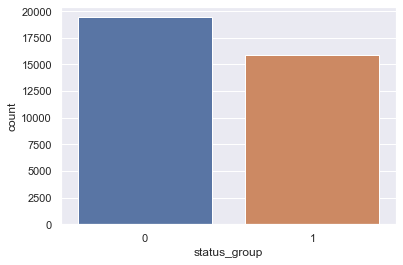

In [17]:
# Checking the new distribuiton of Target varialbe
print (raw_df1['status_group'].value_counts())
print (raw_df1['status_group'].value_counts(normalize=True))
sns.countplot(x = 'status_group', data = raw_df1)

In [18]:
# Time to split take categorical variables and do some one-hot encoding. Not "drop first" this time. 
categorical_variables = raw_df1[['basin', 'region', 'management', 'payment', 'quantity','quality_group', 'source_type', 'extraction_type_class', 'waterpoint_type_group']]
categorical_dummies = pd.get_dummies(categorical_variables)
categorical_dummies.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
categorical_dummies.shape

(35303, 76)

In [20]:
categorical_dummies.columns = categorical_dummies.columns.str.replace('/','_')

In [21]:
categorical_dummies.columns = categorical_dummies.columns.str.replace('-','_')

In [22]:
categorical_dummies.columns = categorical_dummies.columns.str.replace(' ','')

In [23]:
categorical_dummies.head()

,basin_Internal,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_Arusha,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_company,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_neverpay,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_cattletrough,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [24]:
raw_df2 = raw_df1.drop(['basin', 'region', 'management', 'payment', 'quantity','quality_group', 'source_type', 'extraction_type_class', 'waterpoint_type_group'], axis=1)
print(raw_df2.shape)
raw_df2.head()

(35303, 8)


,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group
0,0.0,1399,34.698766,-2.147466,280,1.0,2010,0
1,25.0,686,37.460664,-3.821329,250,1.0,2009,0
2,0.0,263,38.486161,-11.155298,58,1.0,1986,1
3,20.0,0,39.172796,-4.765587,1,1.0,2009,0
4,0.0,62,39.209518,-7.034139,345,0.0,2011,0


In [25]:
data_redux = pd.concat([raw_df2, categorical_dummies], axis=1)
print(data_redux.shape)
data_redux.head()

(35303, 84)


,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group,basin_Internal,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_Arusha,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_company,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_neverpay,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_cattletrough,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
0,0.0,1399,34.698766,-2.147466,280,1.0,2010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,25.0,686,37.460664,-3.821329,250,1.0,2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,263,38.486161,-11.155298,58,1.0,1986,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,20.0,0,39.172796,-4.765587,1,1.0,2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.0,62,39.209518,-7.034139,345,0.0,2011,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [26]:
# Need to split data into X and y dataframes.
y = data_redux['status_group']
X = data_redux.drop(columns=['status_group'], axis=1)
print(y.shape)
print(X.shape)

(35303,)
(35303, 83)


In [27]:
# Create train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(26477, 83)
(8826, 83)
(26477,)
(8826,)


#### Modelling

### Decision Tree Model: B1
This is using the same columns but with 2 classes only and with No SMOTE. 

In [28]:
# Loading relevant libraries and packages
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

import sklearn.datasets as datasets
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [29]:
# Train a DT classifier
treeb1 = DecisionTreeClassifier(max_depth=3, random_state=10)  
treeb1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [30]:
# Predict on training and test sets
training_preds = treeb1.predict(X_train)
test_preds = treeb1.predict(X_test)

In [31]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 70.7%
Test Accuracy: 71.14%


In [32]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - Decision Trees B1')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - Decision Trees B1
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.82      0.75     14600
           1       0.72      0.57      0.64     11877

    accuracy                           0.71     26477
   macro avg       0.71      0.69      0.70     26477
weighted avg       0.71      0.71      0.70     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    All
True                         
0          11940  2660  14600
1           5097  6780  11877
All        17037  9440  26477

--------------------------------------------------------------------------
------------------------------------------------------------------

In [33]:
# Take a look at some feature importance and see if any differnt.
importance = pd.DataFrame(data={'features': X_train.columns, 'importance': treeb1.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(20)

,features,importance
0,quantity_dry,0.449725
1,waterpoint_type_group_other,0.379526
2,construction_year,0.168176
3,latitude,0.002335
4,region_Morogoro,0.000238
5,quantity_insufficient,0.000000
6,quality_group_salty,0.000000
7,quality_group_milky,0.000000
8,quality_group_good,0.000000
9,quality_group_fluoride,0.000000


[0.6287285820530902, 0.691386425211582, 0.7041042871595411, 0.7286631077393831, 0.7296827532426271, 0.7338467944382534, 0.743590930351408, 0.7488877549956156, 0.7575839248164578, 0.7637588802696954, 0.7667900658112725, 0.774466509900573, 0.7794235596814295, 0.7836722657995592, 0.7867595549896786, 0.7871845724192763, 0.7877794812919644, 0.7874678104012779, 0.7882325786257375]


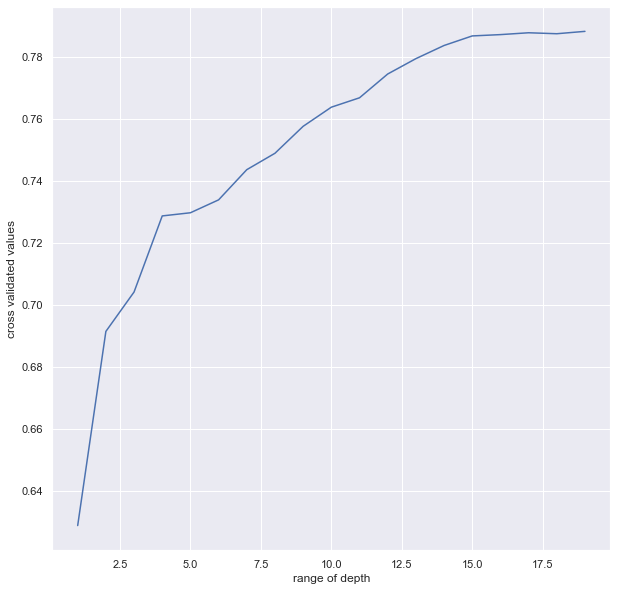

In [34]:
# cross validation to test tree depth values.
score = cross_val_score(treeb1, X, y, cv = 10)
score.mean()
depth_range = range(1,20)
val = []
for depth in depth_range:
    treeb1 = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(treeb1, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

### Observations on Model B1: Decision Tree with 2 class
Suprised to see that the accuracy score was not any better really, at 0.71. No overfiting as train was also at 0.71. The recall for class 1 was at 0.58. The feature importance only show 3 features contributing much, the top one being new to the mix, but one that makes sense: qty_dry. And similar to the other model, the optimal tree depth is reported to be pretty high - around 15, to get a score up to about 0.78. 

In [35]:
# Train a DT classifier
treeb2 = DecisionTreeClassifier(max_depth=15, random_state=10)  
treeb2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=10)

In [36]:
# Predict on training and test sets
training_preds = treeb2.predict(X_train)
test_preds = treeb2.predict(X_test)

In [37]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 87.36%
Test Accuracy: 77.96%


In [38]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - Decision Trees B1')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - Decision Trees B1
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14600
           1       0.90      0.81      0.85     11877

    accuracy                           0.87     26477
   macro avg       0.88      0.87      0.87     26477
weighted avg       0.88      0.87      0.87     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1    All
True                          
0          13514   1086  14600
1           2262   9615  11877
All        15776  10701  26477

--------------------------------------------------------------------------
-------------------------------------------------------------

In [39]:
# Take a look at some feature importance and see if any differnt.
importance = pd.DataFrame(data={'features': X_train.columns, 'importance': treeb2.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(20)

,features,importance
0,quantity_dry,0.154350
1,longitude,0.137392
2,waterpoint_type_group_other,0.130257
3,latitude,0.107340
4,construction_year,0.102898
5,gps_height,0.072590
6,population,0.039401
7,amount_tsh,0.039079
8,quantity_enough,0.025860
9,payment_payperbucket,0.012536


### Observations on Model B2: Decision Tree with 2 class AND depth of 15
As expected, the deeper tree yielded a better accuracy (0.78), but also overfitting (train accuracy of 0.87). Recall also increased to 0.71. By having a deeper tree, we also see more features being used and helps us see another view of feature importance. The top ones are similar to the shallower tree, but also figuring in the top are gps_height, amount_tsh, and some source and extraction type features show up here as well. 

#### APPROACH TO CONSIDER:
Wonder if cut out the 3rd class entirely, if it would have an impact on our models? On the one hand it could be muddying up the current class one (by being added to it), but on the other hand it is only 4K observations and may not have much impact? However, if it is cut, it also will increase class imbalance between clas 0 and 1.

#### Some EDA on the 2 class approach
Taking a look at differences between the 2 target classes and some of the top variables for feature importance. 

<AxesSubplot:xlabel='status_group'>

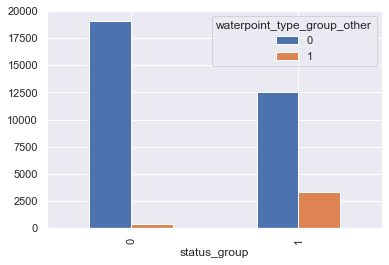

In [40]:
pd.crosstab(data_redux['status_group'],data_redux['waterpoint_type_group_other']).plot.bar()

<AxesSubplot:xlabel='status_group'>

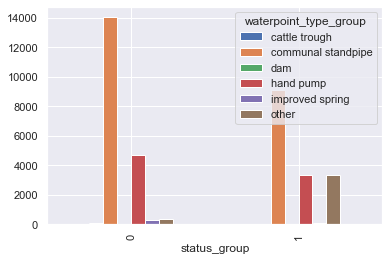

In [47]:
pd.crosstab(raw_df1['status_group'],raw_df1['waterpoint_type_group']).plot.bar()

<AxesSubplot:xlabel='status_group'>

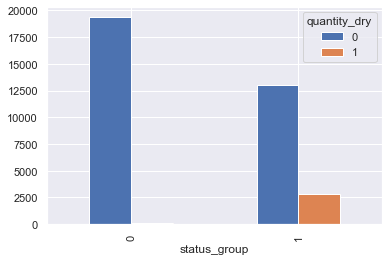

In [41]:
pd.crosstab(data_redux['status_group'],data_redux['quantity_dry']).plot.bar()

<AxesSubplot:xlabel='status_group'>

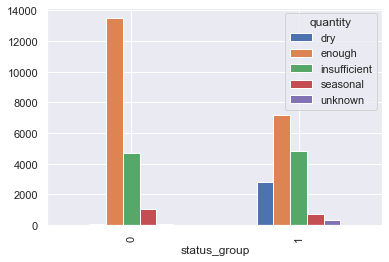

In [48]:
pd.crosstab(raw_df1['status_group'],raw_df1['quantity']).plot.bar()

<AxesSubplot:xlabel='status_group'>

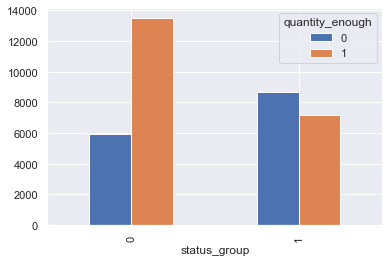

In [42]:
pd.crosstab(data_redux['status_group'],data_redux['quantity_enough']).plot.bar()

<AxesSubplot:xlabel='status_group'>

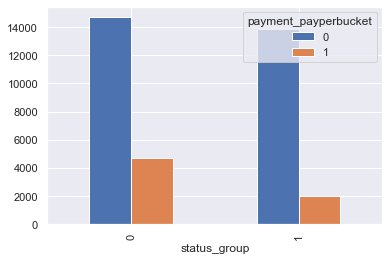

In [43]:
pd.crosstab(data_redux['status_group'],data_redux['payment_payperbucket']).plot.bar()

<AxesSubplot:xlabel='status_group'>

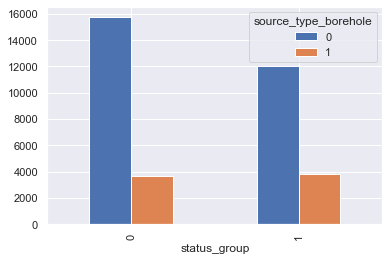

In [44]:
pd.crosstab(data_redux['status_group'],data_redux['source_type_borehole']).plot.bar()

<AxesSubplot:xlabel='status_group'>

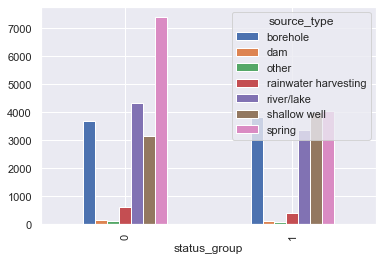

In [50]:
pd.crosstab(raw_df1['status_group'],raw_df1['source_type']).plot.bar()

<AxesSubplot:xlabel='status_group'>

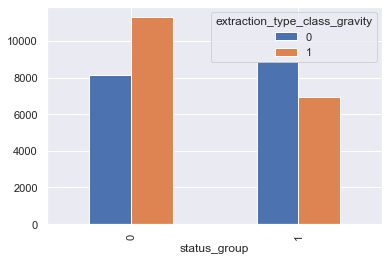

In [45]:
pd.crosstab(data_redux['status_group'],data_redux['extraction_type_class_gravity']).plot.bar()

<AxesSubplot:xlabel='status_group'>

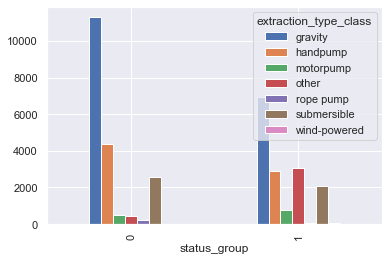

In [49]:
pd.crosstab(raw_df1['status_group'],raw_df1['extraction_type_class']).plot.bar()

<AxesSubplot:xlabel='status_group'>

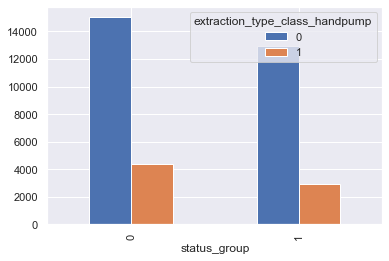

In [46]:
pd.crosstab(data_redux['status_group'],data_redux['extraction_type_class_handpump']).plot.bar()

<AxesSubplot:xlabel='status_group'>

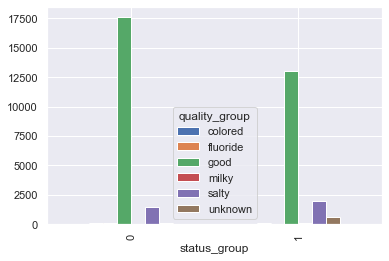

In [51]:
pd.crosstab(raw_df1['status_group'],raw_df1['quality_group']).plot.bar()

<AxesSubplot:xlabel='payment'>

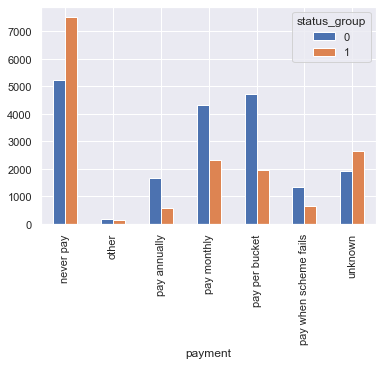

In [110]:
pd.crosstab(raw_df1['payment'],raw_df1['status_group']).plot.bar()

<AxesSubplot:xlabel='status_group'>

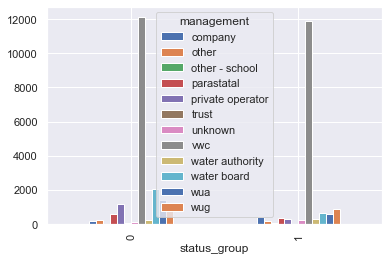

In [112]:
pd.crosstab(raw_df1['status_group'],raw_df1['management']).plot.bar()

<AxesSubplot:xlabel='basin'>

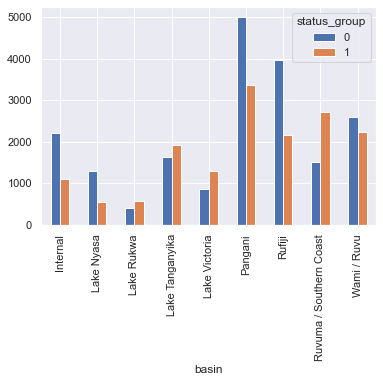

In [113]:
pd.crosstab(raw_df1['basin'],raw_df1['status_group']).plot.bar()

### Simplify data based on feauture importance
This will be an intermediate approach to simplify the dataset. First we will try and make the data more interpretible by eliminating the "other" and "unknown" classes from the remainign categoricial features. Then I will cut out the columns that proved less important according to "feature importance" calculations. I will also cut 2 redundant location features (region abd basin). 

In [56]:
print(data_redux.shape)
data_redux.head()

(35303, 84)


,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year,status_group,basin_Internal,basin_LakeNyasa,basin_LakeRukwa,basin_LakeTanganyika,basin_LakeVictoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_SouthernCoast,basin_Wami_Ruvu,region_Arusha,region_DaresSalaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tanga,management_company,management_other,management_other_school,management_parastatal,management_privateoperator,management_trust,management_unknown,management_vwc,management_waterauthority,management_waterboard,management_wua,management_wug,payment_neverpay,payment_other,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,payment_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_cattletrough,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring,waterpoint_type_group_other
0,0.0,1399,34.698766,-2.147466,280,1.0,2010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,25.0,686,37.460664,-3.821329,250,1.0,2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.0,263,38.486161,-11.155298,58,1.0,1986,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,20.0,0,39.172796,-4.765587,1,1.0,2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.0,62,39.209518,-7.034139,345,0.0,2011,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [58]:
data_redux.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'permit', 'construction_year', 'status_group', 'basin_Internal',
       'basin_LakeNyasa', 'basin_LakeRukwa', 'basin_LakeTanganyika',
       'basin_LakeVictoria', 'basin_Pangani', 'basin_Rufiji',
       'basin_Ruvuma_SouthernCoast', 'basin_Wami_Ruvu', 'region_Arusha',
       'region_DaresSalaam', 'region_Iringa', 'region_Kigoma',
       'region_Kilimanjaro', 'region_Lindi', 'region_Manyara', 'region_Mara',
       'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani',
       'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida',
       'region_Tanga', 'management_company', 'management_other',
       'management_other_school', 'management_parastatal',
       'management_privateoperator', 'management_trust', 'management_unknown',
       'management_vwc', 'management_waterauthority', 'management_waterboard',
       'management_wua', 'management_wug', 'payment_neverpay', 'payment_o

In [59]:
df11 = data_redux.drop(['extraction_type_class_other', 'waterpoint_type_group_other','source_type_other', 'quantity_unknown', 'quality_group_unknown','payment_unknown', 'payment_other','management_unknown','management_other'], axis=1)
print(df11.shape)

(35303, 75)


In [60]:
df12 = df11.drop(['permit', 'basin_Internal',
       'basin_LakeNyasa', 'basin_LakeRukwa', 'basin_LakeTanganyika',
       'basin_LakeVictoria', 'basin_Pangani', 'basin_Rufiji',
       'basin_Ruvuma_SouthernCoast', 'basin_Wami_Ruvu', 'region_Arusha',
       'region_DaresSalaam', 'region_Iringa', 'region_Kigoma',
       'region_Kilimanjaro', 'region_Lindi', 'region_Manyara', 'region_Mara',
       'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani',
       'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida',
       'region_Tanga', 'management_company',
       'management_other_school', 'management_parastatal',
       'management_privateoperator', 'management_trust',
       'management_vwc', 'management_waterauthority', 'management_waterboard',
       'management_wua', 'management_wug'], axis=1)
print(df12.shape)

(35303, 38)


In [61]:
df12.head(2)

,amount_tsh,gps_height,longitude,latitude,population,construction_year,status_group,payment_neverpay,payment_payannually,payment_paymonthly,payment_payperbucket,payment_paywhenschemefails,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,source_type_borehole,source_type_dam,source_type_rainwaterharvesting,source_type_river_lake,source_type_shallowwell,source_type_spring,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_ropepump,extraction_type_class_submersible,extraction_type_class_wind_powered,waterpoint_type_group_cattletrough,waterpoint_type_group_communalstandpipe,waterpoint_type_group_dam,waterpoint_type_group_handpump,waterpoint_type_group_improvedspring
0,0.0,1399,34.698766,-2.147466,280,2010,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,25.0,686,37.460664,-3.821329,250,2009,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [62]:
# Need to split data into X and y dataframes.
y = df12['status_group']
X = df12.drop(columns=['status_group'], axis=1)
print(y.shape)
print(X.shape)

(35303,)
(35303, 37)


In [63]:
# Create train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(26477, 37)
(8826, 37)
(26477,)
(8826,)


### Decision Tree Model: C1
This is using the 2 class target, with simplified data-set of 37 features.

In [87]:
# Train a DT classifier
treec1 = DecisionTreeClassifier(max_depth=3, random_state=10)  
treec1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [88]:
# Predict on training and test sets
training_preds = treec1.predict(X_train)
test_preds = treec1.predict(X_test)

In [89]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 70.3%
Test Accuracy: 70.64%


In [90]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL - Decision Trees C1')
print('Classification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL - Decision Trees C1
Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.87      0.76     14600
           1       0.75      0.50      0.60     11877

    accuracy                           0.70     26477
   macro avg       0.72      0.68      0.68     26477
weighted avg       0.71      0.70      0.69     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    All
True                         
0          12631  1969  14600
1           5894  5983  11877
All        18525  7952  26477

--------------------------------------------------------------------------
------------------------------------------------------------------

In [109]:
# Take a look at some feature importance and see if any differnt.
importance = pd.DataFrame(data={'features': X_train.columns, 'importance': treec1.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(7)

,features,importance
0,quantity_dry,0.498694
1,construction_year,0.263405
2,amount_tsh,0.166462
3,quantity_enough,0.068612
4,latitude,0.002827
5,source_type_river_lake,0.000000
6,source_type_shallowwell,0.000000


### Observations on Model C1
The simplification of the data did not seem to have an effect on Accuracy or Recall of the model. At max_depth 3 the accuracy was 0.71 and recall for class 1 is 0.52. I tried various values for max_depth and got some improvement, as sfollows: @ 6 Ac=0.72; @12 Ac=0.78; @18 Ac=0.78 and Recaal for class 1 was 0.75. But lots of overtaining when max-depth at 18. Feature Importance was examined at max depth of 12 and not too many suproses. One thought is that the continuous variables seem to be playing a larger role - perhaps just in terms of the variety of data within? 

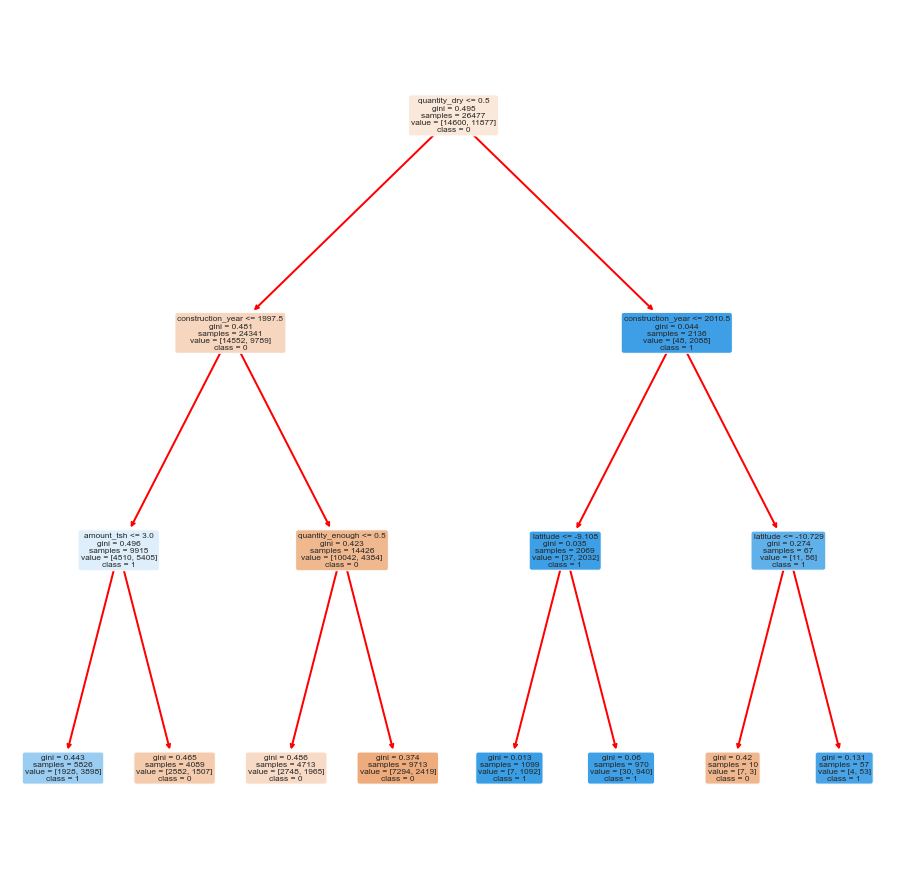

In [92]:
# Plot of decision tree model at max_depth 3
fig, ax = plt.subplots(figsize=(16,16))
out = tree.plot_tree(treec1, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(2)

### XGBoost Model: C1
Just curios to see if another type of model will react differently to the refined dataset... 
This is using the 2 class target, with simplified data-set of 37 features.

In [93]:
# Import libraries needed
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
# Instantiate XGBClassifier
xgc1 = XGBClassifier()

# Fit XGBClassifier
xgc1.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgc1.predict(X_train)
test_preds = xgc1.predict(X_test)

In [95]:
# Get results
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 77.23%
Test Accuracy: 76.59%


In [96]:
# Get detailed results for train and test
# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL = XGBoost-C1')
print('\nClassification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
print('--------------------------------------------------------------------------')
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')
print('--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))
print('--------------------------------------------------------------------------')
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL = XGBoost-C1

Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.86      0.81     14600
           1       0.79      0.67      0.72     11877

    accuracy                           0.77     26477
   macro avg       0.78      0.76      0.77     26477
weighted avg       0.77      0.77      0.77     26477

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0     1    All
True                         
0          12543  2057  14600
1           3971  7906  11877
All        16514  9963  26477
-------------------------------------------------------------------------

In [97]:
# Try some optimization w/ GridSearchCV
param_grid = {
    'learning_rate': [0.2, 0.4],
    'max_depth': [5, 7, 9],
    'min_child_weight': [2, 4],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [98]:
# Code to run it

grid_xgc1 = GridSearchCV(xgc1, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgc1.fit(X_train, y_train)

best_parameters = grid_xgc1.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgc1.predict(X_train)
test_preds = grid_xgc1.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 9
min_child_weight: 4
n_estimators: 100
subsample: 0.7

Training Accuracy: 89.78%
Validation accuracy: 81.69%


In [99]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL = XGBoost-C1-Optimized1')
print('\nClassification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL = XGBoost-C1-Optimized1

Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14600
           1       0.92      0.85      0.88     11877

    accuracy                           0.90     26477
   macro avg       0.90      0.89      0.90     26477
weighted avg       0.90      0.90      0.90     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1    All
True                          
0          13674    926  14600
1           1781  10096  11877
All        15455  11022  26477

--------------------------------------------------------------------------
--------------------------------------------------------

In [100]:
#try second round of GSCV
# Try some optimization w/ GridSearchCV
param_grid = {
    'learning_rate': [0.2, 0.3],
    'max_depth': [8, 9, 11],
    'min_child_weight': [4, 5],
    'subsample': [0.7, 0.8],
    'n_estimators': [100],
}

In [101]:
# Code to run it

grid2_xgc1 = GridSearchCV(xgc1, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid2_xgc1.fit(X_train, y_train)

best_parameters = grid2_xgc1.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid2_xgc1.predict(X_train)
test_preds = grid2_xgc1.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 11
min_child_weight: 4
n_estimators: 100
subsample: 0.7

Training Accuracy: 92.58%
Validation accuracy: 82.11%


In [108]:
# Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL = XGBoost-C1-Optimized1')
print('\nClassification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST  - XGBoost-C-Optimized2')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST - XGBoost-C-Optimized2')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MODEL = XGBoost-C1-Optimized1

Classification Report - TRAIN
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14600
           1       0.94      0.89      0.92     11877

    accuracy                           0.93     26477
   macro avg       0.93      0.92      0.92     26477
weighted avg       0.93      0.93      0.93     26477

--------------------------------------------------------------------------
Confusion Matrix - TRAIN
--------------------------------------------------------------------------
Predicted      0      1    All
True                          
0          13942    658  14600
1           1306  10571  11877
All        15248  11229  26477

--------------------------------------------------------------------------
--------------------------------------------------------

In [105]:
# Take a look at some feature importance for the original XGBoost model above...
importance = pd.DataFrame(data={'features': X_train.columns, 'importance': xgc1.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
importance = importance.reset_index()
importance.drop('index', axis=1, inplace=True)
importance.head(20)

,features,importance
0,quantity_dry,0.201595
1,extraction_type_class_gravity,0.129216
2,amount_tsh,0.101596
3,waterpoint_type_group_communalstandpipe,0.063385
4,quantity_enough,0.059830
5,extraction_type_class_handpump,0.054976
6,construction_year,0.045690
7,waterpoint_type_group_handpump,0.042052
8,source_type_shallowwell,0.036609
9,source_type_spring,0.032746


### Observations on XGBoost Model C1: with 2 classes and simplified dataset. 
As expected, XGBoost did perform better than decision trees. The plain default model had an accuracy of 0.77 and recall of 0.66. I tried 2 rounds of tuning with GridSearchCV. Yes, some noticable overtraining but ended up with a model having max_depth = 11 and min_child = 4 and obtained an accuracy of 0.82 and recall of 0.77. 
In this model, the feature importances showed up differently with quantity, extraction_type, and waterpoint_type havign the most importance and location (longittude) falling down the list to number 11 (0.026).

### Additional Approaches To Take

For the **data-set** I am thinking about 3 approaches: 
1) Hunt and peck (this is the approach I started with): the goal is to retain as much of the original data as possible. Extreme outliers are removed, specific columns are removed if lots of missing values, etc. A conservative approach, where data is retained, but lots of questions remain about the quality of the data. 
2) Slash and burn: this is a radical approach which will try and optimize quality data by removing 0 values and entire subsections of the dataset if large parts are problematic. It will result in a much smaller set of observations but hopefully cleaner data.
3) Cosmetic surgery: this would be an approach to transform some of the 0 values to the median or mean or otherwise changing values rather than dropping them. This retains the observations but makes the data artificial. But perhaps this helps the model do a better job at distinguishing the classes. 

For the **Target variable classes** there are also a few approaches to try:
1) 3 classes with SMOTE: This is taking our class(es) with fewer observations and adding synthetic data to balance it to the majority class levels.
2) 3 clasees with undersampling (nearmiss): This is reducing the size of rhe majority class down to the size of the minority class. Muhc loss of data, but remaining data is "real."
3) Transform to 2 clases: I tried a combo approach where I took the 2 smaller classes and combined them together to get close to the size of the majority class (55% to 45%). It mae conceptual sense, so feel fine using this approach. 
4) Transform to 2 clases: But try just dropping the less important 3rd class. This would reduce the number of observations but may also make clearer seperation between the remaining 2 classes. Might require using SMOTE to address the class imbalance. 

### Creating Functions and Pipelines

In [ ]:
# Function for printing model eval metrics

# Complete the function
def print_metrics(labels, preds):
    print('--------------------------------------------------------------------------')
#     print("Model: {}".format(model_name))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    print('--------------------------------------------------------------------------')
    print(classification_report(y_test, test_preds))
    print('--------------------------------------------------------------------------')
    print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
    print('--------------------------------------------------------------------------')

print_metrics(y_test, y_pred)

In [ ]:
# My original code: Get detailed results (Train and Test)

# Classification Report
print('--------------------------------------------------------------------------')
print('MODEL = XGBoost-C1-Optimized1')
print('\nClassification Report - TRAIN')
print('--------------------------------------------------------------------------')
print(classification_report(y_train, training_preds))
# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TRAIN')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_train, training_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n--------------------------------------------------------------------------')
# Classification Report
print('--------------------------------------------------------------------------')
print('Classification Report - TEST  - XGBoost-C-Optimized2')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, test_preds))

# Confusion Matrix
print('--------------------------------------------------------------------------')
print('Confusion Matrix - TEST - XGBoost-C-Optimized2')
print('--------------------------------------------------------------------------')
print(pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True))
print('--------------------------------------------------------------------------')

## APPENDIX

In [ ]:
# Different format of confusion matrix
pd.DataFrame(confusion_matrix(y_test, yhat), columns=['Pred +', 'Pred Fix', 'Pred -'], index=['Act +', 'Pred Fix', 'Act -'])

In [ ]:
# Confusion matrix plot
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatGS)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatGS))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Functional',
                                           'Functional needs repair', 
                                           'Non functional'],
                                            normalize= False,
                                            title='Confusion matrix')